# Project description
Supervised Learning – Customer Churn Prediction (Beta Bank):
Built and optimized supervised classification models to predict customer churn, addressing class imbalance and evaluating performance using F1 score and AUC-ROC to support data-driven customer retention strategies.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading the dataset
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
# Examing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7501,7502,15605341,Baird,681,France,Female,58,8.0,93173.88,1,1,1,139761.25,0
1691,1692,15772933,Mai,591,Spain,Male,31,8.0,0.00,1,1,1,141677.33,0
760,761,15583212,Chidozie,600,France,Female,43,5.0,134022.06,1,1,0,194764.83,0
8518,8519,15677288,Geach,599,France,Male,50,3.0,121159.65,1,0,0,4033.39,1
3423,3424,15660147,Dore,493,Spain,Male,32,NaN,46161.18,1,1,1,79577.40,0
347,348,15747358,Russell,643,Germany,Male,59,NaN,170331.37,1,1,1,32171.79,0
753,754,15661526,Anderson,815,Germany,Male,37,2.0,110777.26,2,1,0,2383.59,0
6859,6860,15811927,Marcelo,733,France,Female,38,3.0,157658.36,1,0,0,19658.43,0
5174,5175,15812594,Ross,791,France,Male,34,7.0,0.00,2,1,0,96734.46,0
2425,2426,15630167,Gibson,684,Spain,Female,39,4.0,139723.90,1,1,1,120612.11,0


In [5]:
# Checking for duplicates
data.duplicated().sum()

0

In [6]:
# Checking for empty cells
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
# percentage of Tenure values missing
print(((data['Tenure'].isnull().sum())/len(data['Tenure']) * 100),'%')

9.09 %


<AxesSubplot:>

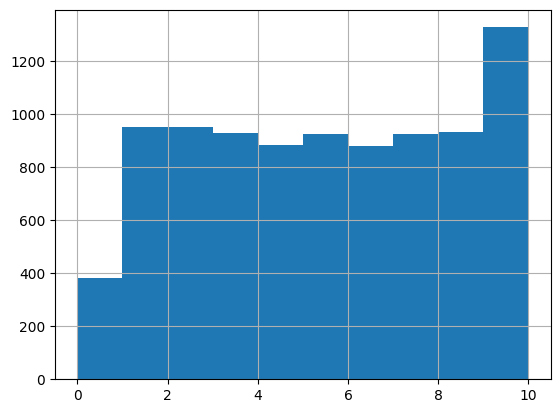

In [8]:
# Distribution of'Tenure'
data['Tenure'].hist()

<AxesSubplot:>

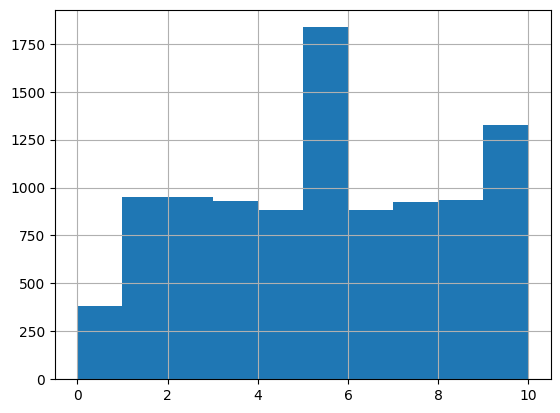

In [9]:
# Tenure — period of maturation for a customer’s fixed deposit (years) 
# given that tenure period is giving in years, 
# I am replacing the NaN values with the median as it is only 9 percent of the data...
# The rest of the features still hold valuable information
tenure_median = data['Tenure'].median()
tenure_median
data['Tenure'].fillna(tenure_median, inplace = True)
data['Tenure'].isnull().sum()
data['Tenure'].hist()

In [10]:
# Dropping collumns not relevant in the data set
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [12]:
data_ohe = pd.get_dummies(data, columns=["Geography", "Gender"], drop_first=True)
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
# Define features and target
target = data_ohe["Exited"]
features = data_ohe.drop("Exited", axis=1)

In [14]:
# Check the distribution of your target variable
print(data_ohe['Exited'].value_counts())
print(data_ohe['Exited'].value_counts(normalize=True))

0    7963
1    2037
Name: Exited, dtype: int64
0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [15]:
# Training, validation, and testing split into 60:20:20  
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.40, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

In [16]:
print(target_train.value_counts(normalize=True))
print(target_valid.value_counts(normalize=True))
print(target_test.value_counts(normalize=True))

0    0.800667
1    0.199333
Name: Exited, dtype: float64
0    0.791
1    0.209
Name: Exited, dtype: float64
0    0.7885
1    0.2115
Name: Exited, dtype: float64


Classes are imbalanced in all of the sets. Roughly 20% of customers have churned and 80% have stayed. 

I will now train the data without balancing to have a baseline comparison.

In [17]:
# Apply scaling to numeric columns to avoid having features being deemed as more important.
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid[numeric])
features_test.loc[:, numeric] = scaler.transform(features_test[numeric])

/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

### Training model without adressing class imbalanced

In [18]:
# Train baseline logisticregression model
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
print('Logistic Regression model trained!')

# calculate f1 score
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f'The f1 score is {f1:.3f}')

#calculate auc_roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f'The auc_roc score is {auc_roc:.3f}')

Logistic Regression model trained!
The f1 score is 0.331
The auc_roc score is 0.759


### Adressing class imbalance


In [19]:
# logistic regression with balanced class weight
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
print('model is trained with class weight being balanced')
predicted_valid = model.predict(features_valid)
print(f'F1: {f1_score(target_valid, predicted_valid):.3f}')
#calculate auc_roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f'The auc_roc score is {auc_roc:.3f}')

model is trained with class weight being balanced
F1: 0.489
The auc_roc score is 0.764


### Upsampling Function 

In [20]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)


### Logistic Regression with upsampling

In [21]:
# logistic regresssion with upsampling
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
print('Logistic Regression with upsampling')
predicted_valid = model.predict(features_valid)

print(f'F1 score is: {f1_score(target_valid, predicted_valid):.3f}')
#calculate auc_roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f'The auc_roc score is {auc_roc:.3f}')


Logistic Regression with upsampling
F1 score is: 0.419
The auc_roc score is 0.765


### Downsampling Function

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

### Logistic Regression with downsampling

In [23]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
print('Logistic Regression with downsampling')

predicted_valid = model.predict(features_valid)

print(f'F1 score is {f1_score(target_valid, predicted_valid):.3f}')
#calculate auc_roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f'The auc_roc score is {auc_roc:.3f}')


Logistic Regression with downsampling
F1 score is 0.431
The auc_roc score is 0.758


### Decision Tree classfier with balanced weight class

In [24]:
# initiating variables
best_f1_score = 0
best_model = None
best_depth = 0 
# loop to find best parameters
for depth in range(1, 11):
    model_dtc = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model_dtc.fit(features_train, target_train)
    
    predicted_valid = model_dtc.predict(features_valid)
    f = f1_score(target_valid, predicted_valid)

    # update best model
    if f > best_f1_score:
        best_f1_score = f
        best_model = model_dtc
        best_depth = depth 
        
# AUC-ROC
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Decision tree model trained with balanced classes')
print(f"\nBest max_depth = {best_depth}")
print(f"Best F1 Score = {best_f1_score:.3f}")
print(f"AUC-ROC = {auc_roc:.3f}")

Decision tree model trained with balanced classes

Best max_depth = 5
Best F1 Score = 0.596
AUC-ROC = 0.831


### Decision Tree with upsampling

In [25]:
best_f1_score = 0
best_model = None
best_depth = 0 
for depth in range(1, 11):
    model_dtc = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_dtc.fit(features_upsampled, target_upsampled)
    
    predicted_valid = model_dtc.predict(features_valid)
    f = f1_score(target_valid, predicted_valid)
    # update best model
    if f > best_f1_score:
        best_f1_score = f
        best_model = model_dtc
        best_depth = depth 
        
# AUC-ROC
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Decision tree model trained with upsampling')

print(f"\nBest max_depth = {best_depth}")
print(f"Best F1 Score = {best_f1_score:.3f}")
print(f"AUC-ROC = {auc_roc:.3f}")

Decision tree model trained with upsampling

Best max_depth = 7
Best F1 Score = 0.525
AUC-ROC = 0.813


### Decision Tree with downsampling

In [26]:
best_f1_score = 0
best_model = None
best_depth = 0 
for depth in range(1, 11):
    model_dtc = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_dtc.fit(features_downsampled, target_downsampled)
    

    predicted_valid = model_dtc.predict(features_valid)
    f = f1_score(target_valid, predicted_valid)
    
    # update best model
    if f > best_f1_score:
        best_f1_score = f
        best_model = model_dtc
        best_depth = depth 
        
# After loop, evaluate AUC-ROC
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Decision tree model trained with downsampling')

print(f"\nBest max_depth = {best_depth}")
print(f"Best F1 Score = {best_f1_score:.3f}")
print(f"AUC-ROC = {auc_roc:.3f}")


Decision tree model trained with downsampling

Best max_depth = 5
Best F1 Score = 0.496
AUC-ROC = 0.815


### RandomForest with balanced weight class

In [27]:
print("Random Forest Classifier with class_weight = balanced:")

best_f1_score_RFC = 0
best_model_RFC = None
best_n_estimators = 0
best_max_depth = 0

# Try different n_estimators and max_depth values
for n_estimators in range(10, 101, 10):          # 10 to 100 trees
    for max_depth in range(2, 21, 2):            # depth from 2 to 20
        model_RFC = RandomForestClassifier(random_state=12345,
            n_estimators=n_estimators,
            max_depth=max_depth,
            class_weight='balanced'
        )
        model_RFC.fit(features_train, target_train)

        predicted_valid_RFC = model_RFC.predict(features_valid)
        f = f1_score(target_valid, predicted_valid_RFC)
        # track the best model
        if f > best_f1_score_RFC:
            best_f1_score_RFC = f
            best_model_RFC = model_RFC
            best_n_estimators = n_estimators
            best_max_depth = max_depth

# Evaluate AUC-ROC for best Random Forest
proba_valid_RFC = best_model_RFC.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, proba_valid_RFC)

print("\nBest Random Forest Model:")
print(f"Best n_estimators = {best_n_estimators}")
print(f"Best max_depth = {best_max_depth}")
print(f"Best F1 Score = {best_f1_score_RFC:.3f}")
print(f"AUC-ROC = {auc_roc_RFC:.3f}")

Random Forest Classifier with class_weight = balanced:

Best Random Forest Model:
Best n_estimators = 100
Best max_depth = 6
Best F1 Score = 0.626
AUC-ROC = 0.853


### Random Forest with upsampling

In [28]:
print("\nInvestigating Random Forest Classifier with upsampling")

best_f1_score_RFC = 0
best_model_RFC = None
best_n_estimators = 0
best_max_depth = 0

# Try different n_estimators and max_depth values
for n_estimators in range(10, 101, 10):          # 10 to 100 trees
    for max_depth in range(2, 21, 2):            # depth from 2 to 20
        model_RFC = RandomForestClassifier(random_state=12345,
            n_estimators=n_estimators,
            max_depth=max_depth,
        )
        model_RFC.fit(features_upsampled, target_upsampled)

        predicted_valid_RFC = model_RFC.predict(features_valid)
        f = f1_score(target_valid, predicted_valid_RFC)
        # track the best model
        if f > best_f1_score_RFC:
            best_f1_score_RFC = f
            best_model_RFC = model_RFC
            best_n_estimators = n_estimators
            best_max_depth = max_depth

# Evaluate AUC-ROC for best Random Forest
proba_valid_RFC = best_model_RFC.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, proba_valid_RFC)

print("\nBest Random Forest Model:")
print(f"Best n_estimators = {best_n_estimators}")
print(f"Best max_depth = {best_max_depth}")
print(f"Best F1 Score = {best_f1_score_RFC:.3f}")
print(f"AUC-ROC = {auc_roc_RFC:.3f}")


Investigating Random Forest Classifier with upsampling

Best Random Forest Model:
Best n_estimators = 90
Best max_depth = 14
Best F1 Score = 0.610
AUC-ROC = 0.835


### Random Forest with downsampling

In [29]:
print("\nInvestigating Random Forest Classifier with downsampling:")

best_f1_score_RFC = 0
best_model_RFC = None
best_n_estimators = 0
best_max_depth = 0

# Try different n_estimators and max_depth values
for n_estimators in range(10, 101, 10):          # 10 to 100 trees
    for max_depth in range(2, 21, 2):            # depth from 2 to 20
        model_RFC = RandomForestClassifier(random_state=12345,
            n_estimators=n_estimators,
            max_depth=max_depth,
        )
        model_RFC.fit(features_downsampled, target_downsampled)

        predicted_valid_RFC = model_RFC.predict(features_valid)
        f = f1_score(target_valid, predicted_valid_RFC)
        # track the best model
        if f > best_f1_score_RFC:
            best_f1_score_RFC = f
            best_model_RFC = model_RFC
            best_n_estimators = n_estimators
            best_max_depth = max_depth

# Evaluate AUC-ROC for best Random Forest
proba_valid_RFC = best_model_RFC.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, proba_valid_RFC)

print("\nBest Random Forest Model:")
print(f"Best n_estimators = {best_n_estimators}")
print(f"Best max_depth = {best_max_depth}")
print(f"Best F1 Score = {best_f1_score_RFC:.4f}")
print(f"AUC-ROC = {auc_roc_RFC:.5f}")


Investigating Random Forest Classifier with downsampling:

Best Random Forest Model:
Best n_estimators = 10
Best max_depth = 20
Best F1 Score = 0.4761
AUC-ROC = 0.78136


### Final Test

In [30]:
print("\nInvestigating Random Forest Classifier with class_weight = balanced:")
model_RFC_test = RandomForestClassifier(random_state=12345,
            n_estimators=100,
            max_depth=6,
            class_weight='balanced'
        )
model_RFC_test.fit(features_train, target_train)

predicted_valid_RFC_test = model_RFC_test.predict(features_test)
f_test = f1_score(target_test, predicted_valid_RFC_test)

# Evaluate AUC-ROC for best Random Forest
proba_valid_RFC_test = model_RFC_test.predict_proba(features_test)[:, 1]
auc_roc_RFC_test = roc_auc_score(target_test, proba_valid_RFC_test)

print("\nBest Random Forest Model:")

print(f"Finaltest F1 Score = {f_test:.3f}")
print(f"Final test AUC-ROC = {auc_roc_RFC_test:.3f}")


Investigating Random Forest Classifier with class_weight = balanced:

Best Random Forest Model:
Finaltest F1 Score = 0.600
Final test AUC-ROC = 0.851


### CONCLUSION
Once the data set was loaded and inspected, I noticed that the 'tenure' column from features has 909 NaN cells. That amounts to roughly 9 percent of missing values. The median of tenure was then calculated and used to replace all of the NaN values.

I also dropped the following rows:
* Rownumber
* CustomerID
* Surname

these are not relevant features for this machine learning assignment.
I also one hot encoded the categorical features ‘Geography’ and ‘Gender’
Once the target and features were defined I split the data set into training, validation, and testing sets using a 60:20:20 ratio. The last step in the preprocessing phase was to standardized the features.  I also noticed their was a class imbalanced of roughly 80:20 for customers that stay vs churn. 

### baseline testing
I used a logistic regression to get a baseline model. I didn’t tune the model nor did I address the class imbalance. This yielded a f1_score of 0.331 with a auc_roc score of 0.759
In order to improve the f1_score to the goal of 0.59 I tried 3 models.
* Logisticregression
* DecisionTree
* RandomForest

I also created a function for upsampling and downsampling to address class imbalanced as well as tried class_weight = balanced.

For logistic regression I tried a balanced class weight, upsampling, and downsampling
For decisiontree I created a loop to find the best performing max depth and tried class weight being balnced, upsampling and downsampling
And lastly for random forest I created a nested loop to find the best amount of estimators and max depth while also having class weight being balance and trying upsampling and downsampling. 

### Final test

Overall the best perfoming model was randomForest with 100 estimators and a depth of 6 with the class_weight = ‘balanced’ parameter. This model was then used again for a final test and produced an f1_score of 0.600and an auc_roc score of 0.851
